![for sale image, from https://time.com/5835778/selling-home-coronavirus/](https://api.time.com/wp-content/uploads/2020/05/selling-home-coronavirus.jpg?w=800&quality=85)

# Project Title

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

Questions to consider:

- Who are your stakeholders?
- What are your stakeholders' pain points related to this project?
- Why are your predictions important from a business perspective?

Stakeholder = real estate broker and their clients seeking to sell

Buisiness Problem = what elements of a house are going to increase price

## Data Understanding

Describe the data being used for this project.

Questions to consider:

- Where did the data come from, and how do they relate to the data analysis questions?
- What do the data represent? Who is in the sample and what variables are included?
- What is the target variable?
- What are the properties of the variables you intend to use?

In [9]:
# code here to explore your data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline



In [10]:
df = pd.read_csv('../../data/kc_house_data.csv')

In [11]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

### Observations

 - What's the difference btwn sqft_living15/sqft_lot15 and sqft_living/sqft_lot?
 - **Target variable is price**
 - Waterfront column is only one with non-null, need to clean that up (assume that null = no waterfront)
 - Categorical columns: waterfront, view, condition, grade 
 - sqft_basement is object, need to convert to numerical format
 - for GIS analysis need to find CSR for lat/long

In [13]:
# run describe on df

df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Observations 

- Looks like there are some extreme outliers in the sqft_lot/sqft_living/bathrooms/bedrooms columns, I am assuming an outlier in one of those columns  means that we'll see similar outliers in the others  
- Wonder what .5 floors counts as? 
- Looking at yr_built and yr_renovated it looks like the later has a log of properties that have no record of renovation
- Do we want to make a "yr_sold" column just to make comparison btween those variables easier (**FEATURE ENGINEERING!!!**)


### Check values in categorical categories

Looking at waterfront, view, condition, and grade columns

In [14]:
df['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

CONVERT TO BOOLEAN

In [15]:
df['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

Can do the hot explode thing here
per column_names.md this descriptor comes from "Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other"


In [16]:
df['condition'].value_counts(0)

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

Per column_names.md 
"How good the overall condition of the house is. Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each condition code"

In [20]:
df['grade'].value_counts().sort_index()

10 Very Good     1134
11 Excellent      399
12 Luxury          89
13 Mansion         13
3 Poor              1
4 Low              27
5 Fair            242
6 Low Average    2038
7 Average        8974
8 Good           6065
9 Better         2615
Name: grade, dtype: int64

Seems odd that they have a Luxury and a Mainson category - could be a source for outliers, may want to remove from df? 

Per column_names.md "Overall grade of the house. Related to the construction and design of the house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each building grade code

In [28]:
## taking a look at luxury and mansion properties
# (titanic["Pclass"] == 2) | (titanic["Pclass"] == 3)]
df_fancy = df[(df.grade == '13 Mansion') | (df.grade =='12 Luxury')]
df_fancy.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.020000e+02,1.020000e+02,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,83.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,3.933945e+09,2.394755e+06,4.343137,4.161765,5734.441176,51427.176471,1.950980,4827.617647,1990.392157,120.156627,98050.470588,47.601396,-122.159647,3962.284314,37400.156863
std,2.621501e+09,1.260305e+06,0.917326,1.213908,1740.699379,102889.651427,0.447821,1386.069720,23.440321,477.471196,53.872917,0.079666,0.128182,924.914108,56646.113445
min,9.800015e+07,8.350000e+05,2.000000,2.500000,3690.000000,3452.000000,1.000000,2090.000000,1902.000000,0.000000,98004.000000,47.306900,-122.408000,1490.000000,2199.000000
25%,1.950059e+09,1.550000e+06,4.000000,3.312500,4490.000000,16504.000000,2.000000,3980.000000,1990.000000,0.000000,98006.000000,47.550800,-122.229500,3275.000000,13894.000000
50%,3.627495e+09,1.930000e+06,4.000000,3.875000,5125.000000,25870.500000,2.000000,4615.000000,1997.500000,0.000000,98033.500000,47.601900,-122.156500,4060.000000,20086.000000
75%,5.034650e+09,2.935000e+06,5.000000,4.750000,6775.000000,39808.000000,2.000000,5487.500000,2001.750000,0.000000,98074.000000,47.642575,-122.107500,4667.500000,35303.750000
max,9.831200e+09,7.700000e+06,8.000000,8.000000,13540.000000,920423.000000,3.500000,9410.000000,2010.000000,2009.000000,98199.000000,47.761500,-121.756000,6210.000000,411962.000000


Interestingly the big outliers (aka 33 bedrooms) are not included here so while the overall price values are higher there's not any obvious reason to dump these rows. 

### Visualizations

Used the OLS lab as a guide on the below

In [36]:
# move all the cat categories out so we can do this quickly

# df_num_cols = df.drop(['waterfront', 'view', 'condition', 'grade'], axis = 1)
# df_num_cols['sqft_basement'] = pd.to_numeric(df['sqft_basement'])
# df_num_cols.info()

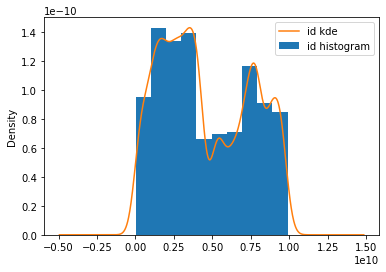

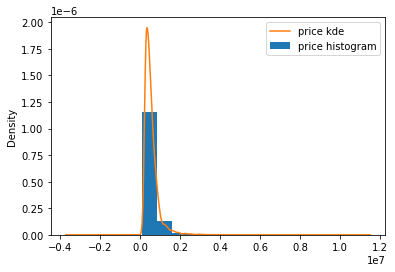

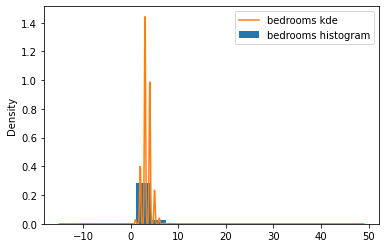

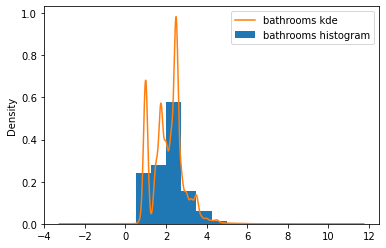

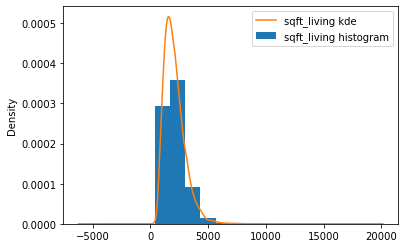

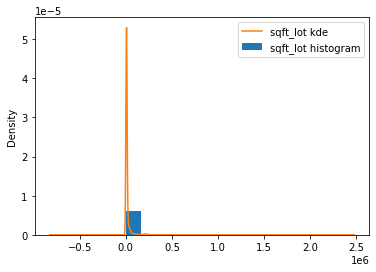

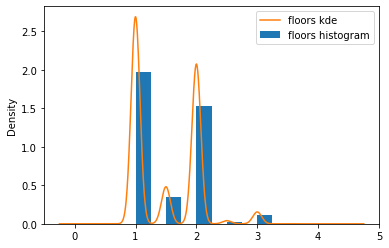

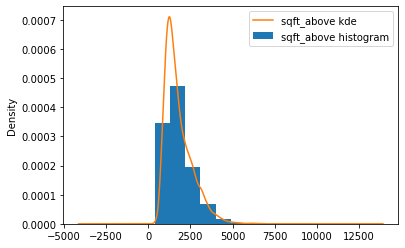

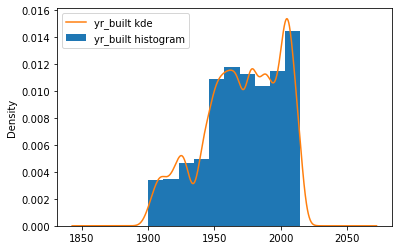

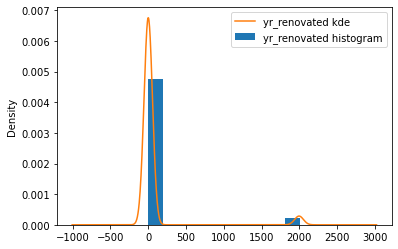

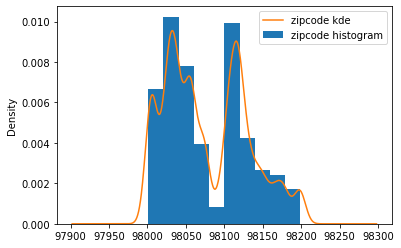

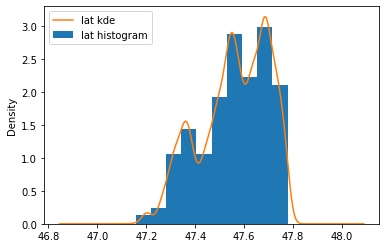

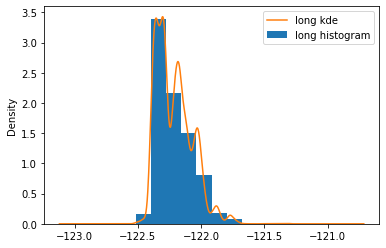

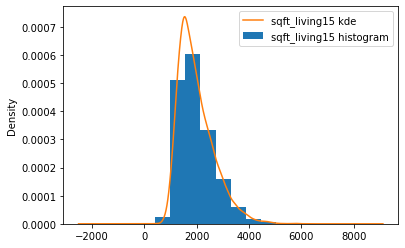

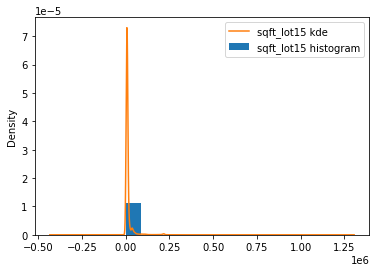

In [43]:
# For all the variables, check distribution by creating a histogram with kde
for column in df:
    if df.dtypes[column] != 'object':
        df[column].plot.hist(density=True, label = column+' histogram')
        df[column].plot.kde(label =column+' kde')
        plt.legend()
        plt.show()

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

0 bedrooms
1 bathrooms
2 sqft_living


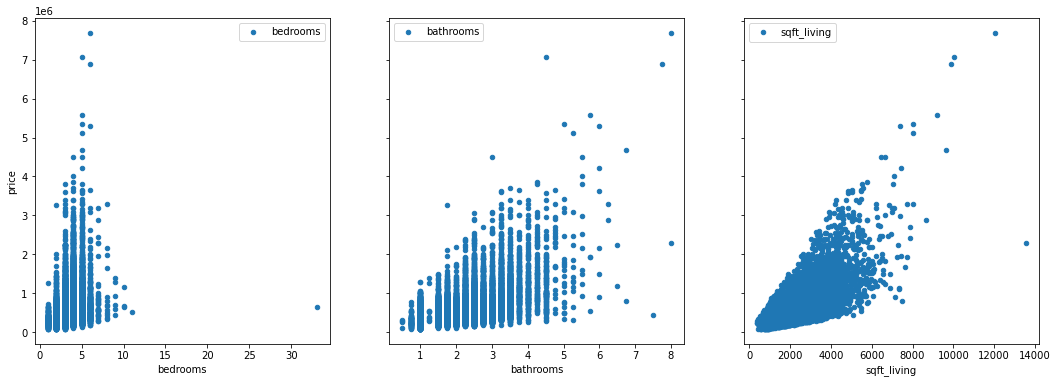

In [50]:
# visualize the relationship between the preditors and the target using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(18, 6))
for idx, channel in enumerate(['bedrooms', 'bathrooms', 'sqft_living']):
    print(idx, channel)
    df.plot(kind='scatter', x=channel, y='price', ax=axs[idx], label=channel)
plt.legend()
plt.show()

0 sqft_lot
1 floors
2 sqft_above


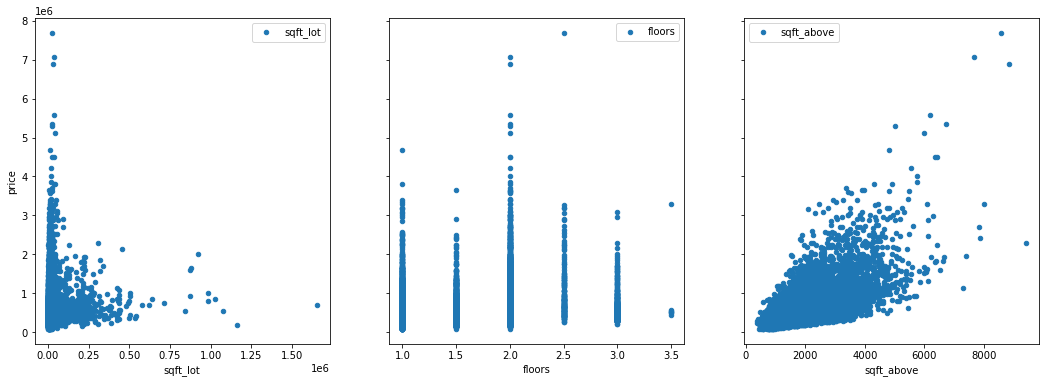

In [51]:

fig, axs = plt.subplots(1, 3, sharey=True, figsize=(18, 6))
for idx, channel in enumerate(['sqft_lot', 'floors', 'sqft_above']):
    print(idx, channel)
    df.plot(kind='scatter', x=channel, y='price', ax=axs[idx], label=channel)
plt.legend()
plt.show()

0 yr_built
1 yr_renovated
2 zipcode


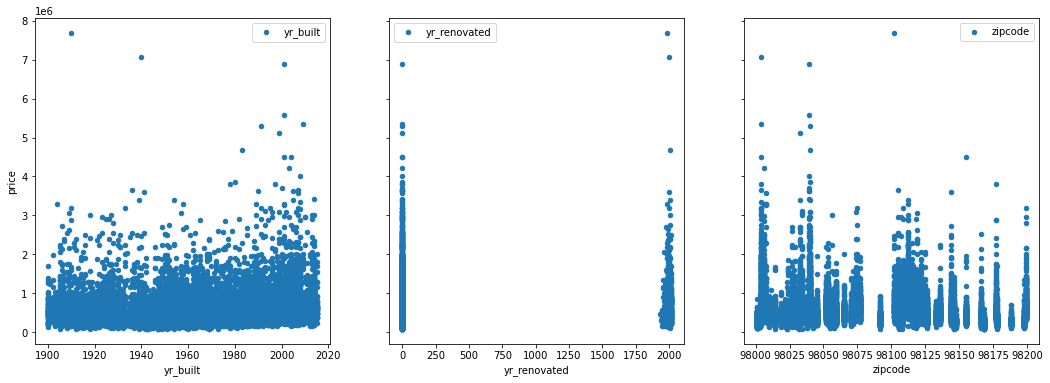

In [52]:

fig, axs = plt.subplots(1, 3, sharey=True, figsize=(18, 6))
for idx, channel in enumerate(['yr_built', 'yr_renovated', 'zipcode']):
    print(idx, channel)
    df.plot(kind='scatter', x=channel, y='price', ax=axs[idx], label=channel)
plt.legend()
plt.show()

0 sqft_living15
1 sqft_lot15


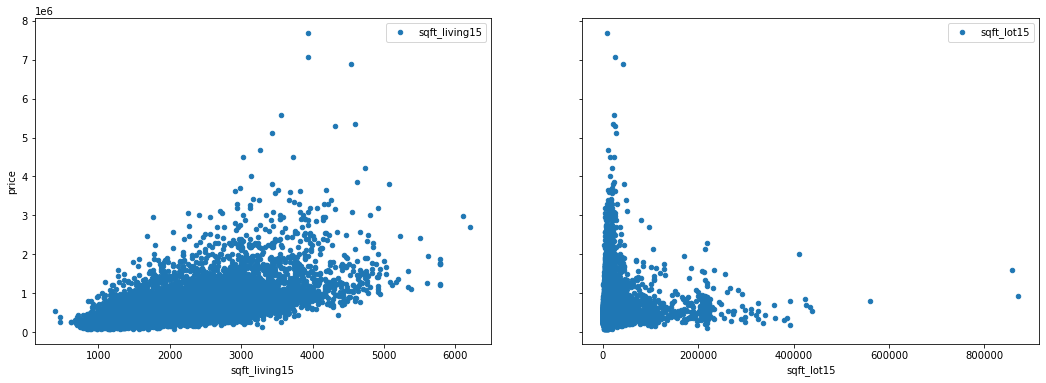

In [54]:

fig, axs = plt.subplots(1, 2, sharey=True, figsize=(18, 6))
for idx, channel in enumerate(['sqft_living15', 'sqft_lot15']):
    print(idx, channel)
    df.plot(kind='scatter', x=channel, y='price', ax=axs[idx], label=channel)
plt.legend()
plt.show()

## Data Preparation

Describe and justify the process for preparing the data for analysis.

Questions to consider:

- Were there variables you dropped or created?
- How did you address missing values or outliers?
- Why are these choices appropriate given the data and the business problem?

In [ ]:
# code here to prepare your data

## Modeling

Describe and justify the process for analyzing or modeling the data.

Questions to consider:

- How did you analyze the data to arrive at an initial approach?
- How did you iterate on your initial approach to make it better?
- Why are these choices appropriate given the data and the business problem?

## Evaluation

The evaluation of each model should accompany the creation of each model, and you should be sure to evaluate your models consistently.

Evaluate how well your work solves the stated business problem. 

Questions to consider:

- How do you interpret the results?
- How well does your model fit your data? How much better is this than your baseline model? Is it over or under fit?
- How well does your model/data fit any modeling assumptions?

For the final model, you might also consider:

- How confident are you that your results would generalize beyond the data you have?
- How confident are you that this model would benefit the business if put into use?

### Baseline Understanding

- What does a baseline, model-less prediction look like?

In [ ]:
# code here to arrive at a baseline prediction

### First $&(@# Model

Before going too far down the data preparation rabbit hole, be sure to check your work against a first 'substandard' model! What is the easiest way for you to find out how hard your problem is?

In [ ]:
# code here for your first 'substandard' model

In [ ]:
# code here to evaluate your first 'substandard' model

### Modeling Iterations

Now you can start to use the results of your first model to iterate - there are many options!

In [ ]:
# code here to iteratively improve your models

In [ ]:
# code here to evaluate your iterations

### 'Final' Model

In the end, you'll arrive at a 'final' model - aka the one you'll use to make your recommendations/conclusions. This likely blends any group work. It might not be the one with the highest scores, but instead might be considered 'final' or 'best' for other reasons.

In [ ]:
# code here to show your final model

In [ ]:
# code here to evaluate your final model

## Conclusions

Provide your conclusions about the work you've done, including any limitations or next steps.

Questions to consider:

- What would you recommend the business do as a result of this work?
- What are some reasons why your analysis might not fully solve the business problem?
- What else could you do in the future to improve this project (future work)?
